<h2><font color="#004D7F" size=6>TFM -Estudio de modelos de predicción, para la gestión de tiempos correctivos en una empresa Industrial.


<h1><font color="#004D7F" size=5>Algortitmo -DecisionTreeRegressor</font></h1>


<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Jose Humberto Torres</font><br>
<font color="#004D7F" size=3>Base de Datos - Predicciones Semanales</font><br>

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


En esta libreta se muestra una predicción de las HH Que se necesitan para mantenimiento correctivo en una empresa del sector industrial, la frecuencia es semanal, a continuación, se hace na breve descripción de la base de datos.:

* **semana:** Hace referencia a la semana del año en la cual se ejecuta el trabajo - se codifica con nombre del año seguido del número de la semana, un año por lo general tiene 52 semanas.
* **Disciplina:** La disciplina se refiera al grupo e equipo de trabajo que realiza mantenimientos en la presa, la empresa está dividida en 7 disciplinas: Pozos, Instrumentos, Mecánica, Mecánica VAL, Electricidad, Línea de Mtto, Mecánica CBM
* **Epocadelanio:** Esta variable hace referencia a la época del año en que se ejecuta el mantenimiento, generalmente son dos estaciones Invierno y verano.
* **Cumplimiento_Estrategia:** Se refiere al cumplimiento del plan de estrategia de mantenimiento preventivo ejecutado en el mes.
* **Cumplimiento_Programa:** Se refiere al cumplimiento del programa de mantenimiento ejecutado en el mes.
* **Ready_Backlog:** Es la carga de trabajo que tienen un equipo de trabajo, se mide en semanas
* **HH_Actv_Gnerales:** son las horas hombres que reportan en actividades generales, esta variable cuantitativa se por actividades como charlas de seguridad, celebraciones, reuniones entre otros.
* **HH_En_la_Maquina:** Es la variable objetivo y hace referencia al total de horas que el técnico necesita para ejecutar un trabajo en la maquina o equipo a reparar.
* **Otras_HH:** Esta variable se refiere a las horas adicionales que se requieren para hacer actividades propias del mantenimiento como lectura de permisos, transporte a sitio, alistamiento de herramientas entre otros.


<a id="section11"></a>
## <font color="#004D7F"> 1.1. Importar librerías</font>

Se importan los módulos y las librerías necesarias para este proceso.

In [5]:
# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [6]:
# codigo para conectar con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="section12"></a>
## <font color="#004D7F"> 1.2. Cargar el dataset</font>

se cargan los datos de ventas, los cuales estan en formato CSV. Y  guardan en una Variable dataset - Que corresponde al DataFrame a trabajar.

In [7]:
# Load dataset
# se cargan los datos de ventas, los cuales estan en formato CSV. Y  guardan en una Variable df - Que corresponde al DataFrame a trabajar.
dataset = pd.read_csv('/content/drive/MyDrive/InfoTFM/semana.csv',index_col=0, sep=',', encoding='latin-1')



<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Estadística descriptiva</font>

Se analizan las diferentes variables y caracteristicas como:
* Dimensiones del conjunto de datos.
* Visualización de datos.
* Resumen estadístico de todos los atributos.
* Coorelación de atributos numéricos.
* Tipo de atributos.

Nota: La base de datos para este caso se le practico un proceso de limpieza y agrupación en el script de R.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos (columnas) hay en nuestro conjunto de datos con la propiedad `shape`.  Donde se aprecia que el dataset cuanta con un total de 984 filas y  8 columnas.

In [8]:
# shape
dataset.shape

(984, 8)

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Visualización de datos</font>

También siempre es una buena idea ver como están representados los datos con la función `head()`

In [9]:
# head
dataset.head(5)

,Disciplina,Epocadelanio,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,HH_En_la_Maquina,Otras_HH
semana,,,,,,,,
2019-1,Instrumentos,Verano,0.98,0.95,5.16,0.37,3.27,0.67
2019-10,Pozoz,Verano,0.99,0.92,4.67,0.30,1.80,1.90
2019-11,Instrumentos,Verano,0.99,0.92,4.67,0.20,0.50,0.00
2019-12,Instrumentos,Verano,0.99,0.92,4.67,1.05,8.00,1.55
2019-12,Mecanica,Verano,0.99,0.92,4.67,0.70,9.00,1.30


In [10]:
# Tambien se puede observar - los diferentes nombres de las columas.
dataset = dataset.reset_index()

dataset.columns

Index(['semana', 'Disciplina', 'Epocadelanio', 'Cumplimiento_Estrategia',
       'Cumplimiento_Programa', 'Ready_Backlog', 'HH_Actv_Gnerales',
       'HH_En_la_Maquina', 'Otras_HH'],
      dtype='object')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   semana                   984 non-null    object 
 1   Disciplina               984 non-null    object 
 2   Epocadelanio             984 non-null    object 
 3   Cumplimiento_Estrategia  984 non-null    float64
 4   Cumplimiento_Programa    984 non-null    float64
 5   Ready_Backlog            984 non-null    float64
 6   HH_Actv_Gnerales         984 non-null    float64
 7   HH_En_la_Maquina         984 non-null    float64
 8   Otras_HH                 984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.3+ KB


In [12]:
dataset.isna().sum().sort_values()

semana                     0
Disciplina                 0
Epocadelanio               0
Cumplimiento_Estrategia    0
Cumplimiento_Programa      0
Ready_Backlog              0
HH_Actv_Gnerales           0
HH_En_la_Maquina           0
Otras_HH                   0
dtype: int64

**Grafico de datos:** Se realiza un gráfico donde se puede observar en la parte X - El numero de la semana y en el eje Y - El total de horas hombre efectivas en la máquina - que es la variable a respuesta.

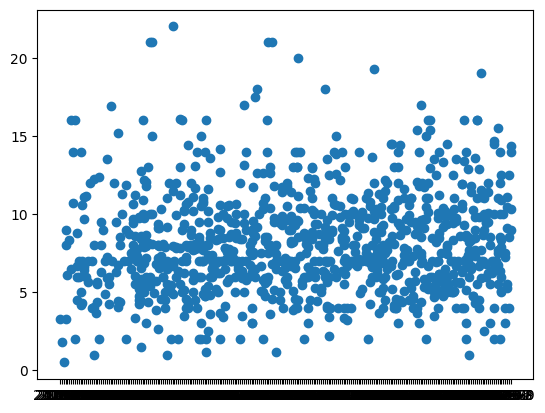

In [13]:
plt.scatter(dataset['semana'],dataset['HH_En_la_Maquina'])
plt.show()

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Resumen estadístico</font>

En este caso podemos echar un vistazo a un resumen de cada atributo con la función `describe()`. Esto incluye la media, los valores mínimo y máximo, así como algunos percentiles.

In [14]:
# descriptions
pd.set_option('display.precision', 1)
dataset.describe()

,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,HH_En_la_Maquina,Otras_HH
count,9.8e+02,9.8e+02,984.0,984.0,984.0,984.0
mean,9.9e-01,9.5e-01,5.3,0.7,8.1,2.0
std,1.1e-02,2.0e-02,0.6,0.3,3.3,1.0
min,9.5e-01,9.1e-01,4.0,0.0,0.5,0.0
25%,9.9e-01,9.4e-01,4.8,0.5,6.0,1.4
50%,9.9e-01,9.5e-01,5.3,0.7,7.6,1.9
75%,1.0e+00,9.7e-01,5.6,0.9,10.0,2.5
max,1.0e+00,9.9e-01,6.7,2.0,22.0,6.0


<a id="section24"></a>
## <font color="#004D7F"> 2.4. Tipo de datos</font>

Se puede observar el tipo de datos de cada una de la variables y adicionalmente se convierte la variable Epocadelanio en binaria 1 y  0 : 1 Para Verano y 2: Invierno.

In [15]:
dataset['Disciplina'] = dataset['Disciplina'].astype("object")


In [16]:
# Convertir variable categorica ciudad en 1 y 0
Epocadelanio = {'Invierno':0,'Verano':1}

dataset['Epocadelanio']=dataset['Epocadelanio'].map(Epocadelanio)

Podemos ver el tipo de variable de cada atributo con la propiedad `dtypes`.

In [17]:
# tipo de datos de las variables.
dataset.dtypes

semana                      object
Disciplina                  object
Epocadelanio                 int64
Cumplimiento_Estrategia    float64
Cumplimiento_Programa      float64
Ready_Backlog              float64
HH_Actv_Gnerales           float64
HH_En_la_Maquina           float64
Otras_HH                   float64
dtype: object

In [18]:
dataset.isna().sum().sort_values()

semana                     0
Disciplina                 0
Epocadelanio               0
Cumplimiento_Estrategia    0
Cumplimiento_Programa      0
Ready_Backlog              0
HH_Actv_Gnerales           0
HH_En_la_Maquina           0
Otras_HH                   0
dtype: int64

In [19]:
# Se observan los datos con la variable epoca del año 1 y 0.
dataset.head(444)

,semana,Disciplina,Epocadelanio,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,HH_En_la_Maquina,Otras_HH
0,2019-1,Instrumentos,1,1.0,0.9,5.2,0.4,3.3,0.7
1,2019-10,Pozoz,1,1.0,0.9,4.7,0.3,1.8,1.9
2,2019-11,Instrumentos,1,1.0,0.9,4.7,0.2,0.5,0.0
3,2019-12,Instrumentos,1,1.0,0.9,4.7,1.1,8.0,1.6
4,2019-12,Mecanica,1,1.0,0.9,4.7,0.7,9.0,1.3
...,...,...,...,...,...,...,...,...,...
439,2021-35,Electricidad,0,1.0,1.0,5.5,0.5,7.0,1.5
440,2021-35,Instrumentos,0,1.0,1.0,5.5,0.5,4.0,0.6
441,2021-37,Electricidad,0,1.0,1.0,5.5,0.6,7.2,1.7
442,2021-37,Instrumentos,0,1.0,1.0,5.5,0.3,5.8,0.5


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

Ahora tenemos una idea básica sobre los datos. Necesitamos extender eso con algunas visualizaciones. Vamos a ver dos tipos de gráficos de visualización de datos:
* Gráficos univariados para comprender mejor cada atributo.
* Gráficos multivariados para comprender mejor las relaciones entre los atributos.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Comenzamos con algunas gráficas univariadas, es decir, gráficas de cada variable individual. Es útil con la visualización tener una forma de referirse solo a los atributos de entrada y, por otro lado, solo a los atributos de salida.

<a id="section311"></a>
### <font color="#004D7F"> Boxplots</font>
Dado que las variables de entrada son numéricas, podemos crear Gráficas Boxplots de cada uno.

Nota: Se puede observar que aún existen valores atípicos, por tanto se va usar una función para rastreo del mejor percentil superior para ajuste de outlayers superiores e inferiores.

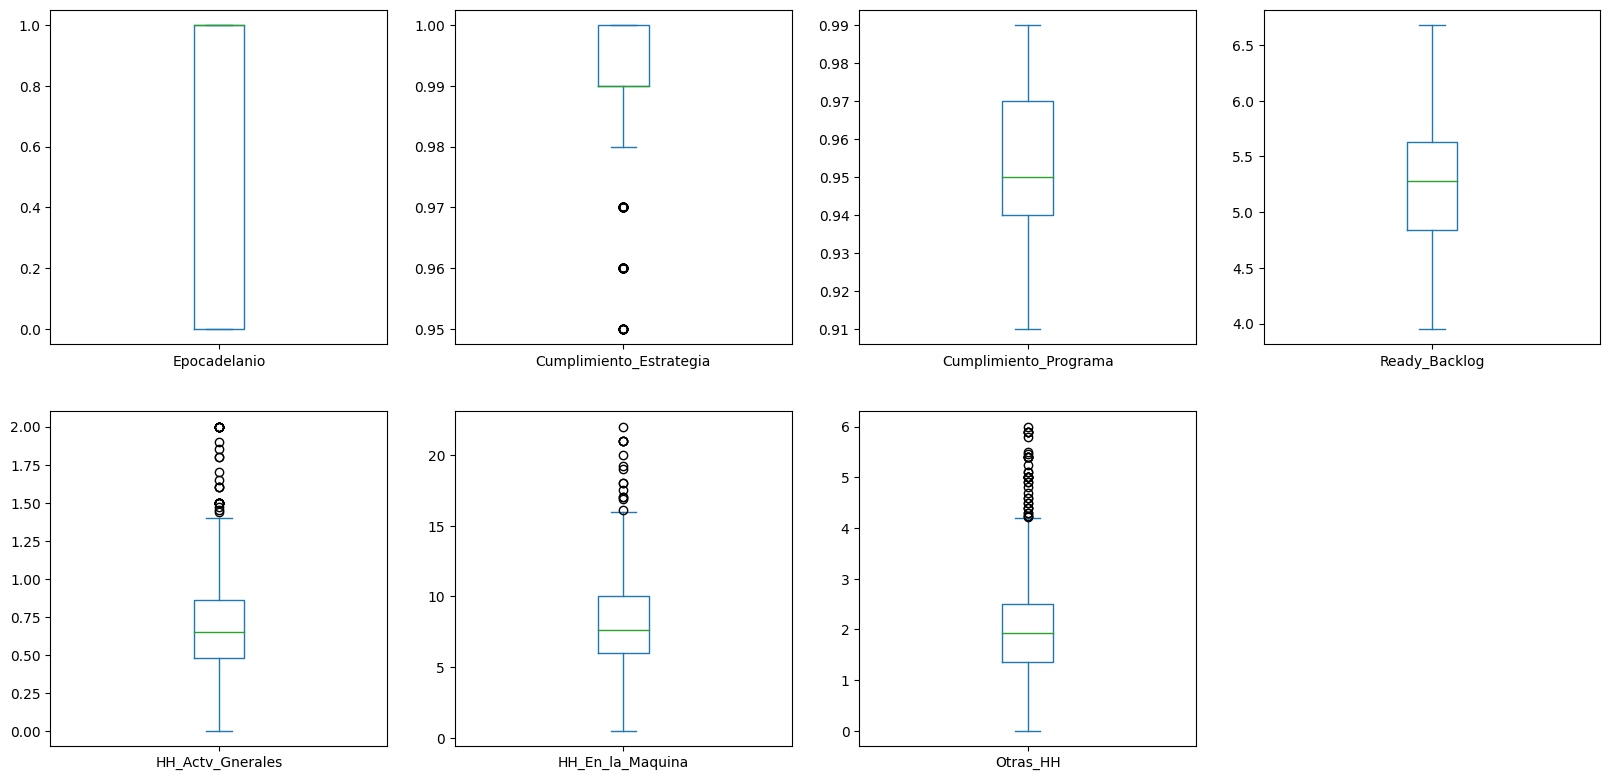

In [20]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.plot(ax=ax, kind= 'box', subplots=True, layout=(4,4))
plt.show()

In [21]:
# ----- Funcion para rastreo del mejor percentil superior para ajuste de outlayers superiores
def HallaMejorPercentilSup(micol,  maximo, minimo, miCotaSup, dataframeA):
	for x in range(maximo, minimo, -1):
		valor_tope_actual = np.quantile(dataframeA.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round_(valor_tope_actual,micol)},col = {micol}, CotaSup = {miCotaSup}")
		if(valor_tope_actual <= miCotaSup):
			return x , valor_tope_actual

In [22]:
# Proceso de correccion de Outlier Superior.

columnas =  [6,7,8]
for col in columnas:
  q3=np.quantile(dataset.iloc[ : , col] , 0.75)
  q1=np.quantile(dataset.iloc[ : , col] , 0.25)
  IQR=q3-q1
  CotaSup=q3+1.5*IQR
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, dataset)
  dataset.iloc[ : , col] = np.where(dataset.iloc[ : , col] > ValorTecho, ValorTecho, dataset.iloc[ : , col] )

Percentil 99 = 1.917,col = 6, CotaSup = 1.4300000000000002
Percentil 98 = 1.5,col = 6, CotaSup = 1.4300000000000002
Percentil 97 = 1.5,col = 6, CotaSup = 1.4300000000000002
Percentil 96 = 1.3436,col = 6, CotaSup = 1.4300000000000002
Percentil 99 = 17.585,col = 7, CotaSup = 16.0
Percentil 98 = 16.0,col = 7, CotaSup = 16.0
Percentil 99 = 5.4,col = 8, CotaSup = 4.21
Percentil 98 = 5.0,col = 8, CotaSup = 4.21
Percentil 97 = 4.5,col = 8, CotaSup = 4.21
Percentil 96 = 4.2,col = 8, CotaSup = 4.21


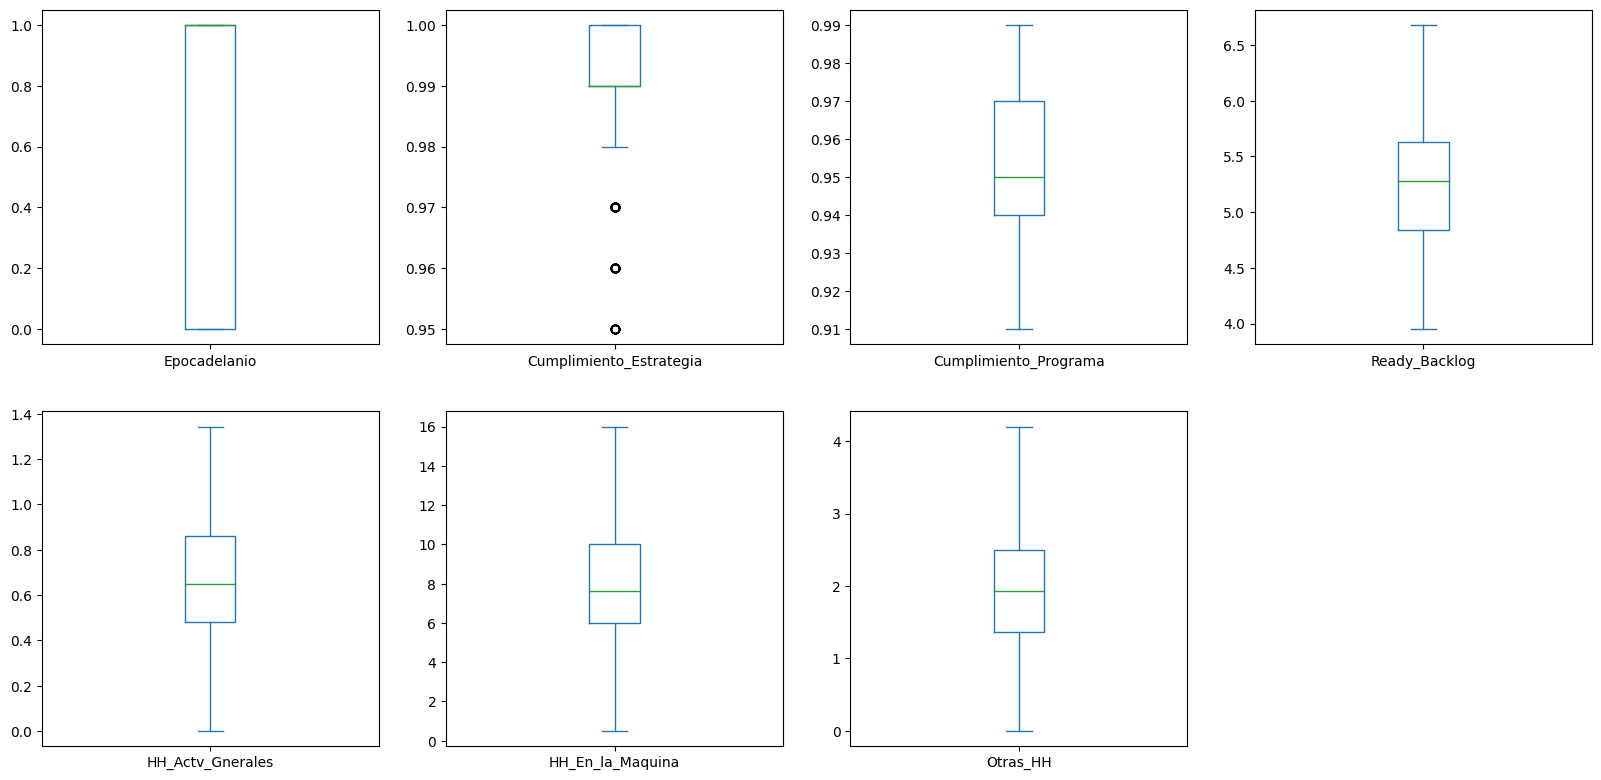

In [23]:
# Ahora se observa que los valores atipicos superiores no existen.
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.plot(ax=ax, kind= 'box', subplots=True, layout=(4,4))
plt.show()

Esto ayuda a señalar el sesgo en muchas distribuciones tanto que los datos se ven como valores atípicos (por ejemplo, más allá del bigote de los gráficos).

<a id="section311"></a>
### <font color="#004D7F"> Histograma</font>
También podemos crear un histograma de cada variable de entrada para tener una idea de la distribución.

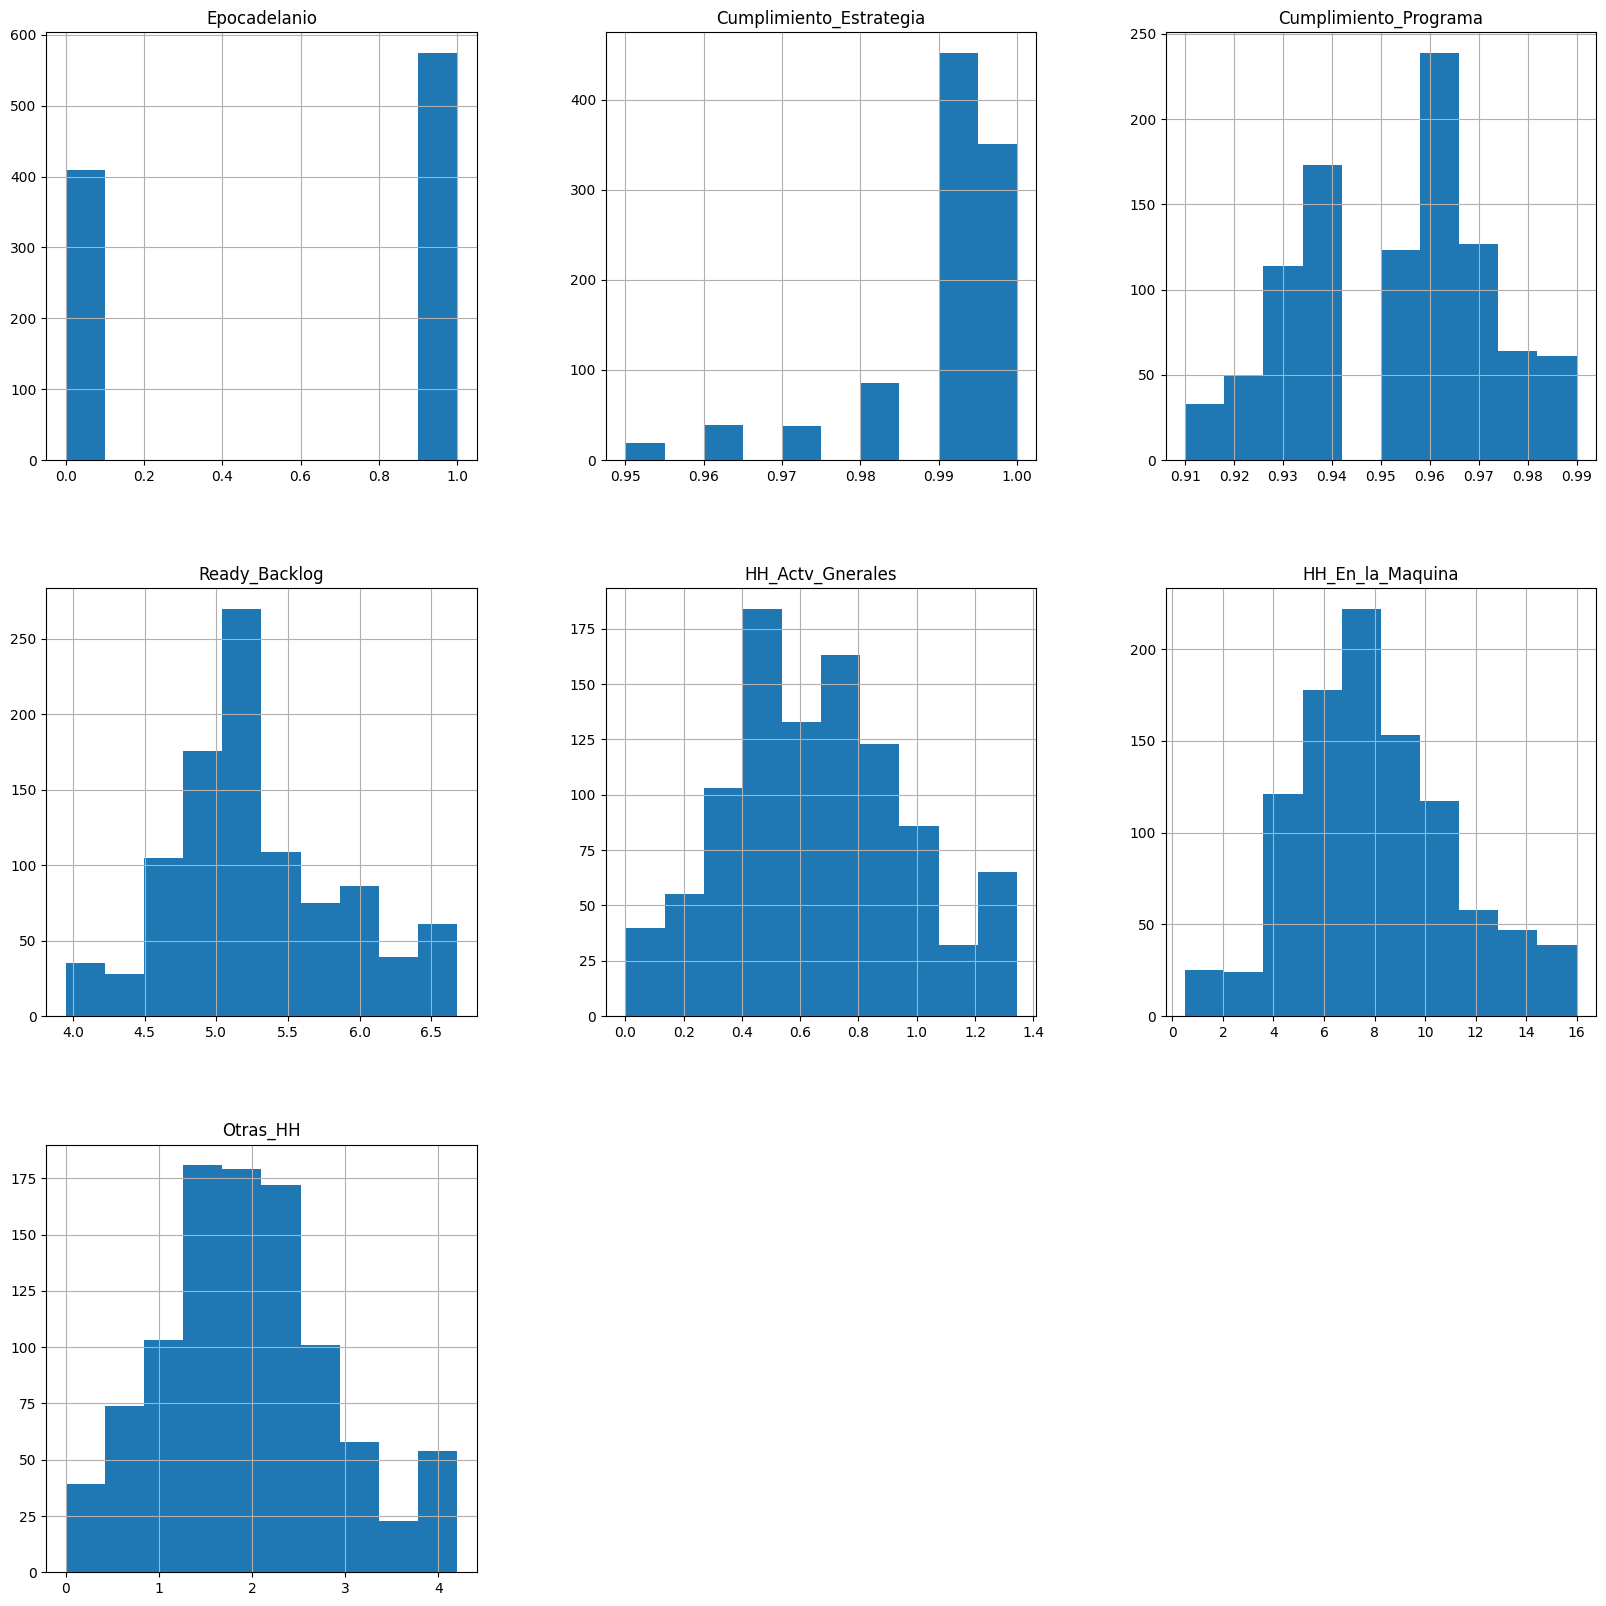

In [24]:
# histograms - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

Podemos ver que algunos atributos pueden tener una distribución exponencial, como `CRIM`, `ZN`, `AGE` y `B`. Podemos ver que otros pueden tener una distribución bimodal como `RAD` y `TAX`.

Esto quizás agrega más evidencia a nuestra sospecha sobre posibles distribuciones exponenciales y bimodales. También parece que `NOX`, `RM` y `LSTAT` pueden tener distribuciones gaussianas sesgadas, lo que podría ser útil más adelante con las transformaciones.

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

Ahora podemos ver las interacciones entre las variables.

<a id="section321"></a>
### <font color="#004D7F"> Diagramas de dispersión</font>
Primero veamos los diagramas de dispersión de todos los pares de atributos y coloreamos los puntos por clase. Además, como los gráficos de dispersión muestran que los puntos para cada clase generalmente están separados, podemos dibujar puntos suspensivos alrededor de ellos.

Ahora podemos ver las interacciones entre las variables. Veamos gráficos de dispersión de todos los pares de atributos. Esto puede ser útil para detectar relaciones estructuradas entre variables de entrada. Tenga en cuenta la agrupación diagonal de algunos pares de atributos. Esto sugiere una alta correlación y una relación predecible.

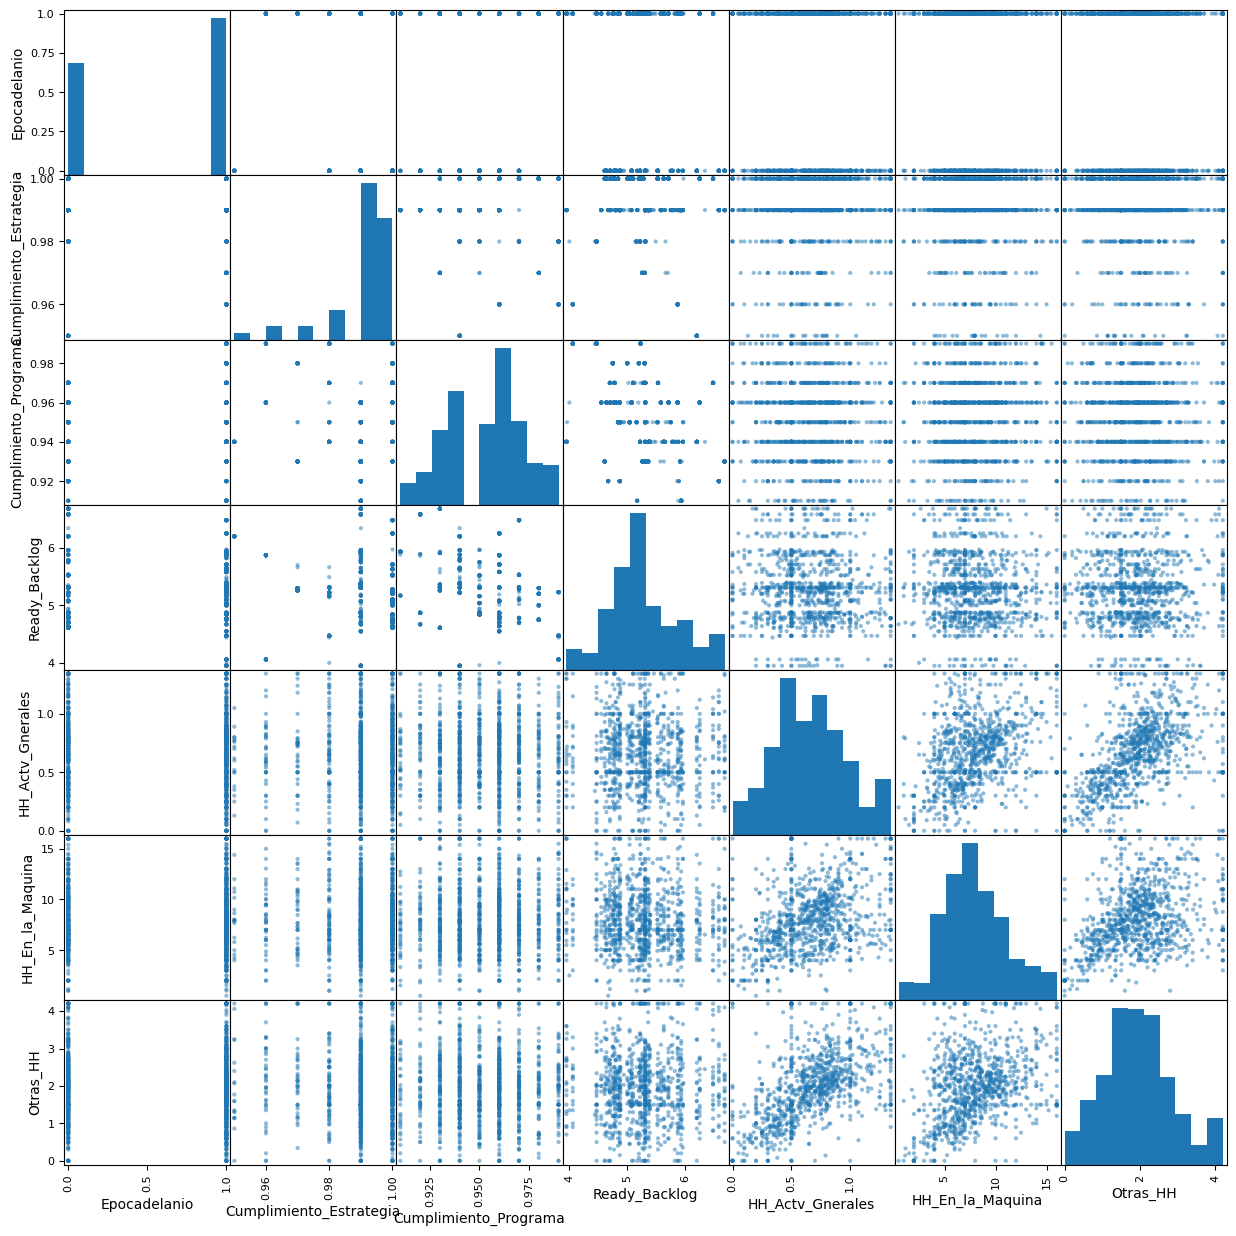

In [25]:
# scatter plot matrix - Matplotlib
plt.rcParams["figure.figsize"] = [15,15]
pd.plotting.scatter_matrix(dataset)
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Fase de modelado</font>

Ahora es el momento de crear algunos modelos de datos y estimar su Accruacy en datos no etiquetados. Esto es lo que vamos a cubrir en este paso:
* Crear conjunto de validación.
* Evaluación de línea base.
* Evaluar algoritmos: Estandarización.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

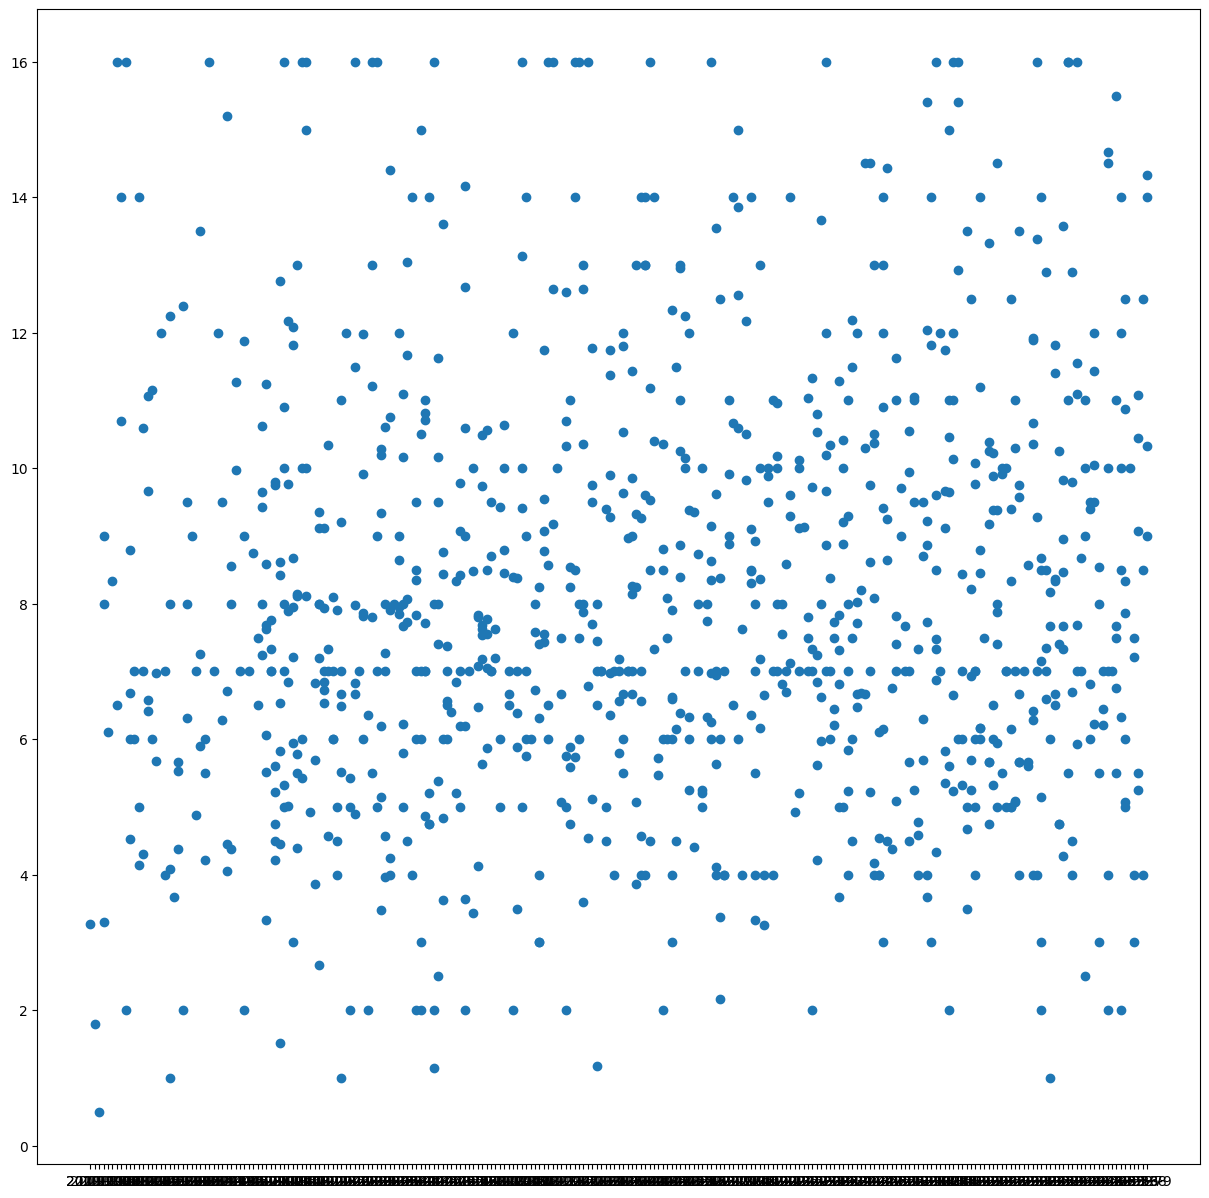

In [26]:
plt.scatter(dataset['semana'],dataset['HH_En_la_Maquina'])
plt.show()

Es una buena idea utilizar un conjunto de validación. Esta es una muestra de los datos que retenemos de nuestro análisis y modelado. Lo usamos justo al final de nuestro proyecto para confirmar el Accuracy de nuestro modelo final. Es una prueba que podemos usar para ver si nos equivocamos y para darnos confianza en nuestras estimaciones de Accuracy en datos no etiquetados. Dividiremos el conjunto de datos cargado en dos, el 90% de los cuales utilizaremos para entrenar nuestros modelos y el 10% como un conjunto de datos de validación.

In [27]:
# Se crea este codigo para ver la posicion de l
posicion_variable = dataset.columns.get_loc('HH_En_la_Maquina')
posicion_variable

7

In [28]:
dataset=dataset.drop('semana', axis=1)


In [29]:
dataset=dataset.drop('Disciplina', axis=1)

In [30]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
                                        dataset.drop('HH_En_la_Maquina', axis = 'columns'),
                                        dataset['HH_En_la_Maquina'],
                                        train_size   = 0.9,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [31]:
# Se muestran los datos almacenados en la varaible  De entrenamiento.
X_train

,Epocadelanio,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,Otras_HH
917,1,1.0,0.9,4.0,0.7,0.9
241,1,1.0,1.0,5.9,0.5,4.2
571,1,1.0,1.0,4.8,1.2,1.7
732,1,1.0,1.0,5.1,0.6,2.2
495,1,1.0,1.0,5.3,0.8,2.2
...,...,...,...,...,...,...
204,0,1.0,0.9,6.6,0.3,0.9
53,0,1.0,0.9,5.9,0.5,1.2
294,1,1.0,1.0,5.7,0.5,1.3
723,1,1.0,1.0,5.3,1.3,1.5


In [32]:
# Se muestran los datos almacenados en la variable de validación.
X_test

,Epocadelanio,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,Otras_HH
166,0,1.0,0.9,5.3,2.0e-01,1.4
392,0,1.0,1.0,4.7,8.0e-02,0.0
40,1,1.0,0.9,5.2,4.0e-01,1.6
118,1,1.0,0.9,5.3,7.7e-01,2.5
953,1,1.0,1.0,4.5,2.5e-01,1.5
...,...,...,...,...,...,...
146,0,1.0,0.9,6.7,6.2e-01,1.4
891,0,1.0,1.0,5.3,6.6e-01,1.5
867,0,1.0,0.9,4.9,5.0e-01,1.5
93,1,1.0,0.9,5.9,8.5e-01,2.8


In [33]:
# Se muestran los datos de la variable Y_train.
y_train

917     5.9
241    14.0
571    10.5
732    11.0
495     7.5
       ... 
204     5.0
53      7.3
294     5.0
723     7.0
815     9.2
Name: HH_En_la_Maquina, Length: 885, dtype: float64

In [34]:
y_test

166     6.0
392     2.0
40      1.0
118     9.8
953     6.8
       ... 
146     5.7
891    11.8
867    16.0
93      7.0
450    10.5
Name: HH_En_la_Maquina, Length: 99, dtype: float64

**Información de las variables:** con las siguientes lineas de código se muestra la información almacenada en cada una de las variables.

In [35]:
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (885, 6)
La forma de y_train es:  (885,)
La forma de X_test es:  (99, 6)
La forma de y_test es:  (99,)


<a id="section43"></a>
## <font color="#004D7F"> 4.3. Evaluar modelos: estandarización</font>

Sospechamos que las diferentes distribuciones de los datos en bruto pueden estar afectando negativamente a la habilidad de algunos de los algoritmos. Vamos a evaluar los mismos algoritmos con una copia estandarizada del conjunto de datos. Aquí es donde los datos se transforman de manera que cada atributo tenga un valor medio de cero y una desviación estándar de uno.

También debemos evitar la fuga de datos cuando transformamos los datos. Una buena manera de evitar fugas es usar Pipelines que estandaricen los datos y construyan el modelo para cada _fold_ de la validación cruzada. De esa forma podemos obtener una estimación justa de cómo cada modelo con datos estandarizados podría funcionar en datos no vistos.

In [36]:
# Normalización con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train
X_test

array([[0.        , 0.8       , 0.5       , 0.4981685 , 0.14885383,
        0.33333333],
       [0.        , 0.8       , 0.625     , 0.27472527, 0.05954153,
        0.        ],
       [1.        , 0.6       , 0.5       , 0.44322344, 0.29770765,
        0.38095238],
       [1.        , 0.8       , 0.25      , 0.4981685 , 0.57308723,
        0.59047619],
       [1.        , 0.6       , 1.        , 0.19047619, 0.18606728,
        0.35714286],
       [1.        , 0.8       , 0.375     , 0.        , 0.22328074,
        0.29761905],
       [0.        , 1.        , 0.75      , 0.57875458, 0.86335219,
        0.68333333],
       [1.        , 0.8       , 0.625     , 0.5970696 , 0.        ,
        0.47619048],
       [1.        , 0.8       , 0.25      , 0.71794872, 0.37213456,
        1.        ],
       [0.        , 1.        , 0.75      , 0.3040293 , 0.37213456,
        0.35      ],
       [1.        , 1.        , 0.875     , 0.38461538, 0.48377493,
        0.44047619],
       [1.        , 0

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>

**Primer Modelo**: Se crea el primer modelo  "modelo1", sin usar hiperparametros y se ajusta con los datos de entrenamiento

In [37]:
# Se crea el modelo 1 sin usar Hiperparamtros
from sklearn.tree import DecisionTreeRegressor

# Crear un árbol de decisión y ajustarlo a los datos de entrenamiento
modelo1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=7)
modelo1.fit(X_train, y_train)

# hacer predicciones con los datos de entrenamiento
y_pred_entrenamiento = modelo1.predict(X_train)
y_pred_entrenamiento

array([10.8  , 11.335,  8.87 ,  9.33 ,  9.42 , 10.9  ,  8.87 , 10.   ,
        5.   ,  7.   ,  8.87 , 14.   ,  6.875,  9.42 ,  7.8  , 12.55 ,
       12.55 ,  7.   ,  9.33 ,  7.8  ,  7.   ,  7.   ,  6.   , 16.   ,
        7.   ,  7.   ,  7.   ,  7.8  ,  8.87 ,  8.87 ,  7.645,  7.   ,
        7.86 ,  8.355, 11.335,  9.42 , 12.55 , 14.   ,  8.355,  7.   ,
        7.   ,  9.33 ,  8.87 ,  7.   ,  7.8  ,  7.625,  5.5  ,  6.325,
        8.87 ,  5.555,  7.8  ,  7.   , 10.405,  7.   ,  6.21 ,  6.875,
        7.   ,  3.93 ,  8.26 ,  5.   ,  9.33 ,  6.325,  9.33 ,  9.42 ,
        7.   ,  7.8  ,  7.   ,  7.625,  6.69 , 14.   ,  8.87 ,  7.   ,
        7.   ,  6.   ,  4.085,  9.42 ,  9.42 ,  8.87 ,  9.42 ,  7.8  ,
       11.29 ,  8.87 , 11.   ,  6.875,  9.42 ,  5.555, 14.   ,  5.375,
        7.   ,  7.   ,  8.26 ,  8.26 ,  8.87 ,  7.   ,  6.21 ,  8.355,
        8.87 ,  2.   ,  8.87 ,  2.17 ,  7.   ,  7.   ,  9.33 ,  9.42 ,
        2.   ,  4.   ,  8.87 ,  4.   ,  7.8  ,  4.04 ,  9.33 ,  7.8  ,
      

In [38]:
# Hacer predicciones en los datos de prueba o Validación.
y_pred_test = modelo1.predict(X_test)
y_pred_test

array([ 5.   ,  2.   ,  7.   ,  5.555,  6.   ,  7.   ,  6.875,  8.26 ,
        7.645, 11.75 ,  9.33 ,  9.42 ,  3.93 ,  7.8  ,  7.8  ,  5.09 ,
        8.26 ,  7.625,  5.375,  7.   ,  7.8  , 10.8  ,  8.87 ,  8.87 ,
        7.   ,  8.87 ,  7.   ,  8.87 ,  4.   , 12.55 , 15.2  ,  9.42 ,
        6.325,  9.42 ,  8.26 ,  8.87 ,  8.26 , 10.9  ,  6.82 ,  7.8  ,
        8.26 , 11.335,  5.555,  4.25 ,  9.42 ,  9.33 ,  3.93 ,  3.93 ,
        8.87 ,  8.87 ,  9.42 , 11.   ,  7.   ,  8.26 ,  7.   ,  2.   ,
        9.33 ,  7.8  ,  9.42 ,  9.42 ,  8.87 ,  6.875,  7.   ,  7.625,
        5.   ,  7.   ,  7.8  ,  7.   , 10.9  ,  5.375,  6.875,  9.17 ,
        8.87 ,  6.   ,  5.375,  7.   ,  8.87 ,  7.   ,  7.   ,  7.8  ,
        7.   , 14.   ,  4.   , 13.   ,  8.87 ,  9.42 ,  7.   ,  8.26 ,
        7.8  ,  7.   , 11.   , 16.   ,  9.42 ,  9.43 , 10.405,  7.67 ,
        7.   ,  7.8  ,  7.   ])

**MAE - Error Absoluto Medio:** s una métrica comúnmente utilizada para evaluar la precisión de modelos de regresión, incluidos los modelos de árboles de decisión.

El MAE se calcula como el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. En términos simples, el MAE mide la magnitud promedio de los errores en las predicciones del modelo, sin considerar la dirección de los errores.

Para un modelo de árbol de decisión, el MAE se calcula de la siguiente manera:

a: Se hace una predicción para cada ejemplo en el conjunto de datos de prueba usando el modelo de árbol de decisión.

b: Se calcula la diferencia absoluta entre la predicción y el valor real para cada ejemplo.

c: Se toma el promedio de todas estas diferencias absolutas.

Para mayor información:
https://statologos.com/calculadora-del-error-medio-absoluto/






In [39]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

mse = mean_squared_error(y_test , y_pred_test)
rmse = np.sqrt(mse)
MAE= mae(y_test , y_pred_test)


In [40]:
# Imprimir las métricas
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Error Absoluto Medio (MAE):", MAE)


Error Cuadrático Medio (MSE): 11.995493434343434
Raíz del Error Cuadrático Medio (RMSE): 3.4634510873323205
Error Absoluto Medio (MAE): 2.5782828282828287


In [41]:
max_error(y_test , y_pred_test)

9.125

In [42]:
max_error(y_test , y_pred_test)

9.125

In [43]:
# calcular el MAE de entrenamiento con cros Validation
from sklearn.model_selection import cross_val_score
mae_train_m1 = -1 * cross_val_score(modelo1, X_train,y_train, cv=5, scoring='neg_mean_absolute_error').mean()

print("Error Absoluto Medio (MAE):", mae_train_m1)

Error Absoluto Medio (MAE): 2.5369378531073448


In [44]:
# calcular el MSE de entrenamiento con cross Validation
mse_train_m1 = cross_val_score(modelo1, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print("Error Cuadrático Medio (MSE):", -mse_train_m1)

# calcular el RMSE de entrenamiento con cross Validation
rmse_train_m1 = (-mse_train_m1) ** 0.5
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_train_m1)

Error Cuadrático Medio (MSE): 11.654657401129944
Raíz del Error Cuadrático Medio (RMSE): 3.413891826219739


**Predicciones**: Se hacen las respectivas predicciones, donde se cita la variables y_pred_test -  y se compara con los valores reales de validación.

In [45]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'TotalHotasReales' : y_test, 'TotalPrediccion' : y_pred_test})
df_predicciones.head(122)

,TotalHotasReales,TotalPrediccion
166,6.0,5.0
392,2.0,2.0
40,1.0,7.0
118,9.8,5.6
953,6.8,6.0
...,...,...
146,5.7,10.4
891,11.8,7.7
867,16.0,7.0
93,7.0,7.8


In [46]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones4 = pd.DataFrame({'TotalHotasReales' : y_train, 'TotalPrediccion' : y_pred_entrenamiento})
df_predicciones4.head(111)

,TotalHotasReales,TotalPrediccion
917,5.9,10.8
241,14.0,11.3
571,10.5,8.9
732,11.0,9.3
495,7.5,9.4
...,...,...
355,13.1,8.9
873,3.0,4.0
780,15.4,7.8
569,4.0,4.0


**Se crea un gráfico del arbol que se genera para este caso**: Se observa que la profundidad es de 7 y tiene un total de 93 Nodos.

Profundidad del árbol: 7
Número de nodos terminales: 93


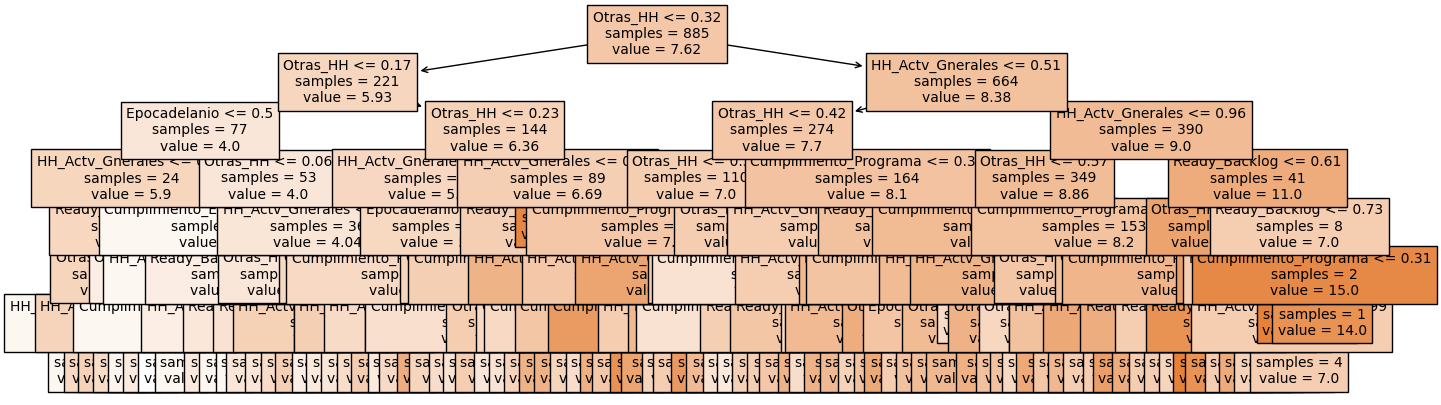

In [47]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 5))

print(f"Profundidad del árbol: {modelo1.get_depth()}")
print(f"Número de nodos terminales: {modelo1.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo1,
            feature_names = dataset.drop(columns = "HH_En_la_Maquina").columns,
            class_names   = 'HH_En_la_Maquina',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [48]:
from sklearn.tree import export_text
texto_modelo = export_text(
                    decision_tree = modelo1,
                    feature_names = list(dataset.drop(columns = "HH_En_la_Maquina").columns)
               )
print(texto_modelo)

|--- Otras_HH <= 0.32
|   |--- Otras_HH <= 0.17
|   |   |--- Epocadelanio <= 0.50
|   |   |   |--- HH_Actv_Gnerales <= 0.04
|   |   |   |   |--- value: [11.00]
|   |   |   |--- HH_Actv_Gnerales >  0.04
|   |   |   |   |--- Ready_Backlog <= 0.66
|   |   |   |   |   |--- Otras_HH <= 0.08
|   |   |   |   |   |   |--- HH_Actv_Gnerales <= 0.24
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |--- HH_Actv_Gnerales >  0.24
|   |   |   |   |   |   |   |--- value: [5.50]
|   |   |   |   |   |--- Otras_HH >  0.08
|   |   |   |   |   |   |--- HH_Actv_Gnerales <= 0.29
|   |   |   |   |   |   |   |--- value: [6.33]
|   |   |   |   |   |   |--- HH_Actv_Gnerales >  0.29
|   |   |   |   |   |   |   |--- value: [5.09]
|   |   |   |   |--- Ready_Backlog >  0.66
|   |   |   |   |   |--- Otras_HH <= 0.04
|   |   |   |   |   |   |--- value: [8.00]
|   |   |   |   |   |--- Otras_HH >  0.04
|   |   |   |   |   |   |--- Otras_HH <= 0.13
|   |   |   |   |   |   |   |--- value: [2.33]
|   

**Importancia de las Variables predictoras:**

In [49]:
importancia_predictores = pd.DataFrame(
                            {'predictor': dataset.drop(columns = "HH_En_la_Maquina").columns,
                             'importancia': modelo1.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,Otras_HH,5.5e-01
4,HH_Actv_Gnerales,2.4e-01
3,Ready_Backlog,9.6e-02
2,Cumplimiento_Programa,7.2e-02
0,Epocadelanio,2.6e-02
1,Cumplimiento_Estrategia,1.7e-02


**Se crea un nuevo modelo usando hiperparametros**

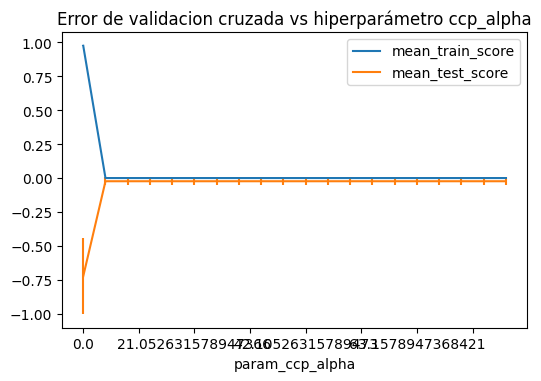

In [50]:
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [51]:
grid.best_params_

{'ccp_alpha': 4.2105263157894735}

**Se crea el modelo** Y se crea la imagen del arbol final.

In [52]:
# Estructura del árbol final - "Modelofinal"
# ------------------------------------------------------------------------------

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Creamos un modelo de árbol de decisión
tree = model_1a = DecisionTreeRegressor()

# Usamos GridSearchCV para encontrar la mejor combinación de hiperparámetros
modelo_final = GridSearchCV(tree, param_grid, cv=5)
modelo_final.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados



# hacer predicciones con los datos de entrenamiento
Predicion_MF_entrenamiento = modelo_final.predict(X_train)
Predicion_MF_test = modelo_final.predict(X_test)

In [53]:
# Los mejores hiperparametros.
param_grid


{'max_depth': [3, 5, 7],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2']}

**Comparacion del MAE para los dos modelos creados.**

1: MAE para modelo sin hiperparametros: 2.29

2: MAE: para el modelo con ajuste de hiperparametros: 2.55.

Nota: El MAE mide la magnitud promedio de los errores en las predicciones de un modelo de regresión, sin tener en cuenta su dirección (es decir, si son sobreestimaciones o subestimaciones).

Por lo tanto, un MAE más bajo indica que las predicciones del modelo están más cerca de los valores reales en el conjunto de datos de prueba. En otras palabras, cuanto más bajo sea el MAE, mejor será el ajuste del modelo a los datos observados y, por lo tanto, se considera un mejor rendimiento del modelo.

fuente: ChatGPT

In [54]:
# calcular el MAE de entrenamiento con cros Validation  - COn Hiperparametros
from sklearn.model_selection import cross_val_score
mae_train_m2 = -1 * cross_val_score(modelo_final, X_train,y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print("MAE de entrenamiento Cros Validation - Con Hiperparametros:", mae_train_m2)
print("MAE de entrenamiento Cros Validation - Sin Hiperparametros:", mae_train_m1)

MAE de entrenamiento Cros Validation - Con Hiperparametros: 2.3129057141337426
MAE de entrenamiento Cros Validation - Sin Hiperparametros: 2.5369378531073448


**Conclusión**

El modelo con ajuste de hiperparametros es mas eficiente para predecir las HH necesarias para trabajos correctivos en una empresa industrial.

In [55]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones5 = pd.DataFrame({'TotalHotasReales' : y_test, 'TotalPrediccion' : Predicion_MF_test
})
df_predicciones5.head(5)

,TotalHotasReales,TotalPrediccion
166,6.0,6.7
392,2.0,4.2
40,1.0,6.8
118,9.8,8.7
953,6.8,6.7


<h2><font color="#004D7F" size=6>TFM -Estudio de modelos de predicción, para la gestión de tiempos correctivos en una empresa Industrial.


<h1><font color="#004D7F" size=5>Algoritmo - Support Vector Machine</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Jose Humberto Torres</font><br>
<font color="#004D7F" size=3>Base de Datos - Predicciones Semanales</font><br>

**Algortimo SVM para Regresión**

El algoritmo SVM (Support Vector Machine, Máquina de Vectores de Soporte en español) es un poderoso algoritmo de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión. Es especialmente efectivo en espacios de alta dimensionalidad y es versátil debido a su capacidad para manejar tanto datos linealmente separables como no linealmente separables.

**Ajuste de parámetros (Opcional):** Si es necesario, ajusta los hiperparámetros del modelo para obtener un mejor rendimiento. Esto se puede hacer utilizando técnicas como la validación cruzada.






**Modelo sin Hiperparametros**

In [56]:
# Crear el modelo SVR
modelo2_svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Ajustar el modelo
modelo2_svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [57]:
y_pred_entrenamiento_SVR = modelo2_svr.predict(X_train)
y_pred_entrenamiento_SVR

array([ 6.43284353,  9.67441762,  8.65646412,  9.2125562 ,  9.08151302,
        8.98389671,  8.39456778,  6.37320131,  8.06677786,  6.80186027,
        8.49012179,  9.74855104,  9.34251361,  9.67347312,  8.50969299,
        8.39492532,  9.66562638,  7.33574303,  8.0481546 ,  9.12258773,
        7.72509262,  6.95925485,  5.9818688 ,  8.80154288,  7.85969713,
        7.52677663,  7.21668486,  8.41925025,  8.497214  ,  8.60588672,
        8.03265999,  6.78937664,  8.593745  ,  8.75702723,  8.10699259,
        8.79392081, 10.324273  ,  9.53560217,  8.78225288,  7.39674985,
        7.43340564,  9.43600662,  7.96771957,  7.30632104,  8.65172845,
        7.39112357,  7.01045457,  5.89752468,  8.57862279,  8.85655967,
        8.81629273,  7.31204359,  6.73854706,  6.33811068,  6.7593974 ,
        8.67161249,  7.25083454,  4.34968785,  8.70020334,  5.74843067,
        8.14386837,  5.90491152,  8.1035389 ,  8.94530932,  7.16099903,
        9.72558243,  7.16099903,  6.96302177,  5.39222208,  9.13

In [58]:
y_pred_test_SVR = modelo2_svr.predict(X_test)
y_pred_test_SVR

array([6.16554753, 5.18566832, 7.03447336, 9.03653039, 6.32220495,
       6.07736729, 8.26632209, 6.48440641, 7.53055734, 7.6591513 ,
       8.08042791, 9.403098  , 5.58010734, 9.26086952, 9.62360008,
       6.90090312, 8.65183991, 7.42789073, 6.36795596, 7.71917721,
       7.70489949, 7.38118234, 8.33397   , 8.29551813, 6.2023548 ,
       7.88240099, 8.04886858, 8.736471  , 7.61897602, 9.75938   ,
       8.83182565, 9.76076642, 5.61070712, 8.63240063, 8.02676151,
       8.32807178, 8.18494271, 9.2464352 , 6.74261726, 9.2735908 ,
       8.06991121, 8.06702998, 8.42066749, 7.69864175, 8.21792256,
       7.66849333, 4.42300026, 5.13983766, 8.64895597, 8.91750085,
       7.90382112, 5.15305536, 7.09197153, 7.95057314, 8.01933413,
       5.93166252, 7.4542203 , 9.45000965, 9.10203749, 8.94265899,
       7.726628  , 8.44255828, 7.19050576, 6.94599864, 8.32260837,
       6.85260447, 8.85089767, 7.32602072, 8.99924195, 6.12200622,
       9.99563785, 7.95678185, 8.52652088, 6.32569429, 6.35536

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as mae1


mae_svr = mae1(y_test, y_pred_test_SVR)

mse_svr = mean_squared_error(y_test , y_pred_test_SVR)
rmse = np.sqrt(mse_svr)

In [60]:
# Imprimir las métricas
print("Error Cuadrático Medio (MSE):", mse_svr)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Error Absoluto Medio (MAE):", mae_svr)

Error Cuadrático Medio (MSE): 9.113794734107442
Raíz del Error Cuadrático Medio (RMSE): 3.018906214857865
Error Absoluto Medio (MAE): 2.344132607422241


In [61]:
# calcular el MAE de entrenamiento con cros Validation
from sklearn.model_selection import cross_val_score
mae_svrCV = -1 * cross_val_score(modelo2_svr, X_train,y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print("MAE de entrenamiento Cros Validation:", mae_svrCV)
print("MAE de entrenamiento Cros SIN - Cross Validation:", mae_svr)

MAE de entrenamiento Cros Validation: 2.208224967297778
MAE de entrenamiento Cros SIN - Cross Validation: 2.344132607422241


In [62]:
# Calcular el MSE de entrenamiento con cross Validation
mse_svrCV = cross_val_score(modelo2_svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print("MSE de entrenamiento Cross Validation:", -mse_svrCV)

# Calcular el RMSE de entrenamiento con cross Validation
rmse_svrCV = (-mse_svrCV) ** 0.5
print("RMSE de entrenamiento Cross Validation:", rmse_svrCV)

# Calcular el R² de entrenamiento con cross Validation
r2_svrCV = cross_val_score(modelo2_svr, X_train, y_train, cv=5, scoring='r2').mean()
print("R² de entrenamiento Cross Validation:", r2_svrCV)

MSE de entrenamiento Cross Validation: 8.48060330082634
RMSE de entrenamiento Cross Validation: 2.912147541047043
R² de entrenamiento Cross Validation: 0.12387443874514366


In [63]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones_SVR = pd.DataFrame({'TotalHotasReales' : y_test, 'TotalPrediccion' : y_pred_test_SVR})
df_predicciones_SVR.head(23)

,TotalHotasReales,TotalPrediccion
166,6.0,6.2
392,2.0,5.2
40,1.0,7.0
118,9.8,9.0
953,6.8,6.3
922,11.0,6.1
444,6.6,8.3
357,7.0,6.5
60,7.0,7.5
426,8.0,7.7


**Planteneamiento de un Modelo SVR con Ajuste de Hiperparametros**

El SVR con ajuste de hiperparámetros es una poderosa técnica de regresión que puede manejar eficientemente datos no lineales, es menos sensible a los datos atípicos, ofrece flexibilidad en la elección de funciones de kernel, tiene regularización incorporada, puede funcionar bien en conjuntos de datos pequeños a medianos, está basado en principios sólidos de optimización, y proporciona información interpretable sobre los resultados del modelo. Sin embargo, su desempeño depende en gran medida de una cuidadosa selección y ajuste de los hiperparámetros.


In [64]:
# Definir los hiperparámetros a probar.
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1, 10]
}

In [65]:
# Crear el modelo SVR

svr = SVR()

# Crear el modelo con búsqueda de cuadrícula
modelo3_SVR = GridSearchCV(svr, param_grid, cv=5)

# Ajustar el modelo con búsqueda de cuadrícula
modelo3_SVR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [66]:
# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo3_SVR.best_params_)

Mejores hiperparámetros: {'C': 1, 'epsilon': 1, 'kernel': 'linear'}


In [67]:
# hacer predicciones con los datos de entrenamiento - con el modelo entrenado
y_pred_train_M3_SVR = modelo3_SVR.predict(X_train)

# Predice los valores para el conjunto de prueba utilizando los mejores hiperparámetros encontrados
y_pred_M3SVR= modelo3_SVR.predict(X_test)
y_pred_M3SVR

array([ 6.25140485,  4.97239317,  7.00439632,  8.59639806,  6.63144268,
        6.7542073 ,  9.6987053 ,  6.13301645,  9.12123796,  7.10926147,
        7.71596499,  8.65417239,  5.37866497,  9.00132899,  9.17773033,
        6.74834902,  7.93211863,  7.2003024 ,  6.44346986,  7.89993119,
        9.2161289 ,  9.12374377,  8.05848393,  7.9659269 ,  6.11348864,
        7.54894524,  8.99593432,  8.47552828,  7.05986687,  9.93017329,
        9.03234309,  9.01065114,  5.62194992,  8.51382197,  7.41007163,
        8.18423685,  7.57156652,  9.44634781,  6.25910851, 10.13077303,
        7.76421095,  8.70342152,  8.99350279,  7.97420014,  8.27346704,
        7.15904133,  5.80890168,  5.89451838,  8.03023412,  8.42652564,
        8.35605829,  4.62724763,  7.05613774,  7.45928931,  7.68241396,
        5.31792986,  7.9792569 ,  8.80281095,  8.80818805,  8.30137716,
        7.83108182,  9.65512037,  6.97151707,  6.69471289,  7.84413545,
        6.77586226,  9.21872333,  7.88243434,  9.16767918,  6.09

MAE - Error Absoluto Medio: s una métrica comúnmente utilizada para evaluar la precisión de modelos de regresión, incluidos los modelos de árboles de decisión.

El MAE se calcula como el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. En términos simples, el MAE mide la magnitud promedio de los errores en las predicciones del modelo, sin considerar la dirección de los errores.

Para un modelo de árbol de decisión, el MAE se calcula de la siguiente manera:

a: Se hace una predicción para cada ejemplo en el conjunto de datos de prueba usando el modelo de árbol de decisión.

b: Se calcula la diferencia absoluta entre la predicción y el valor real para cada ejemplo.

c: Se toma el promedio de todas estas diferencias absolutas.

Para mayor información: https://statologos.com/calculadora-del-error-medio-absoluto/

In [68]:
mae_svr3 = mae1(y_test, y_pred_M3SVR)

mse_svr3 = mean_squared_error(y_test , y_pred_M3SVR)
rmse3 = np.sqrt(mse_svr3)

In [69]:
# Imprimir las métricas
print("Error Cuadrático Medio (MSE):", mse_svr3)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse3)
print("Error Absoluto Medio (MAE):", mae_svr3)

Error Cuadrático Medio (MSE): 9.310982208747946
Raíz del Error Cuadrático Medio (RMSE): 3.051390209191205
Error Absoluto Medio (MAE): 2.4261486511693517


In [70]:
# calcular el MAE de entrenamiento con cros Validation
from sklearn.model_selection import cross_val_score
mae_svrCV3 = -1 * cross_val_score(modelo3_SVR, X_train,y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print("MAE de entrenamiento Cros Validation:", mae_svrCV3)
print("MAE de entrenamiento Cros SIN - Cross Validation:", mae_svr3)

MAE de entrenamiento Cros Validation: 2.247043995272633
MAE de entrenamiento Cros SIN - Cross Validation: 2.4261486511693517


In [71]:
# Calcular el MSE de entrenamiento con cross Validation
mse_svrCV3 = cross_val_score(modelo3_SVR, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print("MSE de entrenamiento Cross Validation:", -mse_svrCV3)

# Calcular el RMSE de entrenamiento con cross Validation
rmse_svrCV3 = (-mse_svrCV3) ** 0.5
print("RMSE de entrenamiento Cross Validation:", rmse_svrCV3)

# Calcular el R² de entrenamiento con cross Validation
r2_svrCV3 = cross_val_score(modelo3_SVR, X_train, y_train, cv=5, scoring='r2').mean()
print("R² de entrenamiento Cross Validation:", r2_svrCV3)

MSE de entrenamiento Cross Validation: 8.556268164370698
RMSE de entrenamiento Cross Validation: 2.9251099405613283
R² de entrenamiento Cross Validation: 0.1152891568281019


**Comparacion del MAE para los dos modelos creados.**

1: MAE para modelo sin hiperparametros:2.42

2: MAE: para el modelo con ajuste de hiperparametros: 2.24

Nota: El MAE mide la magnitud promedio de los errores en las predicciones de un modelo de regresión, sin tener en cuenta su dirección (es decir, si son sobreestimaciones o subestimaciones).

Por lo tanto, un MAE más bajo indica que las predicciones del modelo están más cerca de los valores reales en el conjunto de datos de prueba. En otras palabras, cuanto más bajo sea el MAE, mejor será el ajuste del modelo a los datos observados y, por lo tanto, se considera un mejor rendimiento del modelo.

fuente: ChatGPT

**Predicciones**:
Se hacen las respectivas predicciones, donde se cita la variables y_pred_M3SVR -  y se compara con los valores reales de validación.

In [72]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones_SVR3 = pd.DataFrame({'TotalHotasReales' : y_test, 'TotalPrediccion' : y_pred_M3SVR})
df_predicciones_SVR3.head(23)

,TotalHotasReales,TotalPrediccion
166,6.0,6.3
392,2.0,5.0
40,1.0,7.0
118,9.8,8.6
953,6.8,6.6
922,11.0,6.8
444,6.6,9.7
357,7.0,6.1
60,7.0,9.1
426,8.0,7.1


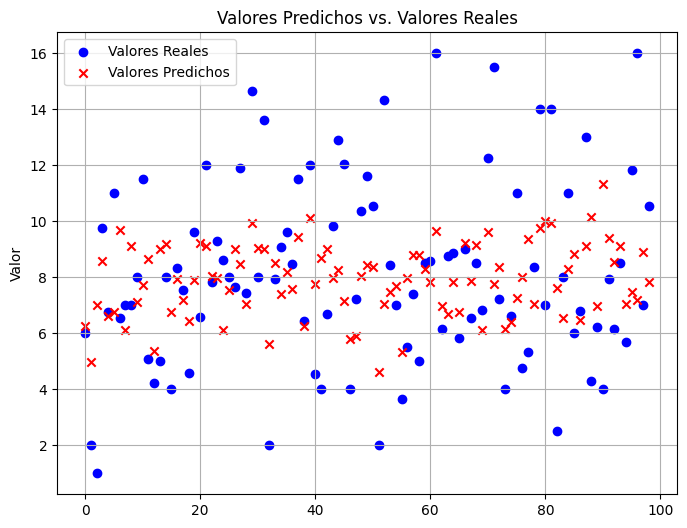

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Valores reales y predicciones)
y_test = y_test
y_pred = y_pred_M3SVR

# Crear figura y ejes
plt.figure(figsize=(8, 6))

# Graficar valores reales
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reales', marker='o')

# Graficar valores predichos
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Valores Predichos', marker='x')

# Etiquetas y título
plt.xlabel('')
plt.ylabel('Valor')
plt.title('Valores Predichos vs. Valores Reales')

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

<h2><font color="#004D7F" size=6>TFM -Estudio de modelos de predicción, para la gestión de tiempos correctivos en una empresa Industrial.


<h1><font color="#004D7F" size=5>Algoritmo - Random Forest</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Jose Humberto Torres</font><br>
<font color="#004D7F" size=3>Base de Datos - Predicciones Semanales</font><br>

In [74]:
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit() #
cv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamiento del modelo
modelo5_RF = RandomForestRegressor(n_estimators=100, random_state=42)
modelo5_RF.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = modelo5_RF.predict(X_test)

# Calcular métricas de desempeño
msem5 = mean_squared_error(y_test, y_pred)
r2m5 = r2_score(y_test, y_pred)
maerfm5 = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {msem5:.3f}")
print(f"R-squared (R2): {r2m5:.3f}")
print(f"Mean Absolute Error (MAE): {maerfm5:.3f}")

Mean Squared Error (MSE): 8.742
R-squared (R2): 0.183
Mean Absolute Error (MAE): 2.343


In [77]:
# Calcular el MAE de entrenamiento con cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

mae_RF5 = -1 * cross_val_score(modelo5_RF, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print("MAE de entrenamiento Cross Validation:", mae_RF5)

# Calcular el MSE de entrenamiento con cross Validation
mse_RF5 = cross_val_score(modelo5_RF, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print("MSE de entrenamiento Cross Validation:", -mse_RF5)

# Calcular el RMSE de entrenamiento con cross Validation
rmse_RF5 = (-mse_RF5) ** 0.5
print("RMSE de entrenamiento Cross Validation:", rmse_RF5)

# Calcular el R² de entrenamiento con cross Validation
r2_RF5 = cross_val_score(modelo5_RF, X_train, y_train, cv=5, scoring='r2').mean()
print("R² de entrenamiento Cross Validation:", r2_RF5)

MAE de entrenamiento Cross Validation: 2.34363557842346
MSE de entrenamiento Cross Validation: 9.035650528114548
RMSE de entrenamiento Cross Validation: 3.0059358822361046
R² de entrenamiento Cross Validation: 0.06322957826315086


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Random Forest
modelo6_Hip = RandomForestRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(modelo6_Hip, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo final con los mejores hiperparámetros
Modelo6 = RandomForestRegressor(**best_params, random_state=42)
Modelo6.fit(X_train, y_train)

# Evaluar el modelo final en el conjunto de prueba
y_pred = Modelo6.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
maerf = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R2): {r2:.3f}")
print(f"Mean Absolute Error (MAE): {maerf:.3f}")

Mejores hiperparámetros: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error (MSE): 8.398
R-squared (R2): 0.215
Mean Absolute Error (MAE): 2.256


In [79]:
# Calcular el MAE de entrenamiento con cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

mae_RF = -1 * cross_val_score(Modelo6, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print("MAE de entrenamiento Cross Validation:", mae_RF)

# Calcular el MSE de entrenamiento con cross Validation
mse_RF = cross_val_score(Modelo6, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print("MSE de entrenamiento Cross Validation:", -mse_RF)

# Calcular el RMSE de entrenamiento con cross Validation
rmse_RF = (-mse_RF) ** 0.5
print("RMSE de entrenamiento Cross Validation:", rmse_RF)

# Calcular el R² de entrenamiento con cross Validation
r2_RF = cross_val_score(Modelo6, X_train, y_train, cv=5, scoring='r2').mean()
print("R² de entrenamiento Cross Validation:", r2_RF)

MAE de entrenamiento Cross Validation: 2.2051077768519476
MSE de entrenamiento Cross Validation: 7.967556163001473
RMSE de entrenamiento Cross Validation: 2.822685983775289
R² de entrenamiento Cross Validation: 0.17612094922144478


In [80]:
# Comparar resultados de los modelos
print("\nComparación de resultados:")
print(f"MSE sin optimizar: {msem5:.3f} | MSE optimizado: {mse:.3f}")
print(f"R2 sin optimizar: {r2m5:.3f} | R2 optimizado: {r2:.3f}")
print(f"MAE sin optimizar: {maerfm5:.3f} | MAE optimizado: {maerf:.3f}")

if mse < msem5:
    print("El modelo optimizado tiene un mejor desempeño en términos de MSE.")
elif r2 > r2m5:
    print("El modelo optimizado tiene un mejor desempeño en términos de R².")
elif maerf < maerfm5:
    print("El modelo optimizado tiene un mejor desempeño en términos de MAE.")
else:
    print("No hay una diferencia significativa en el desempeño de los modelos.")


Comparación de resultados:
MSE sin optimizar: 8.742 | MSE optimizado: 8.398
R2 sin optimizar: 0.183 | R2 optimizado: 0.215
MAE sin optimizar: 2.343 | MAE optimizado: 2.256
El modelo optimizado tiene un mejor desempeño en términos de MSE.


**Metrica MAPE**

Usando Métrica de Error Porcentual Absoluto Medio (MAPE, por sus siglas en inglés) también es una métrica útil para evaluar el desempeño de modelos de regresión.

Encontramos que se tiene un 39.39% de desviación,  indica que en promedio, las predicciones del modelo se desvían un 39.39% de los valores reales. Cuanto menor sea el MAPE, mejor será el desempeño del modelo

In [81]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

Mean Absolute Percentage Error (MAPE): 39.39%


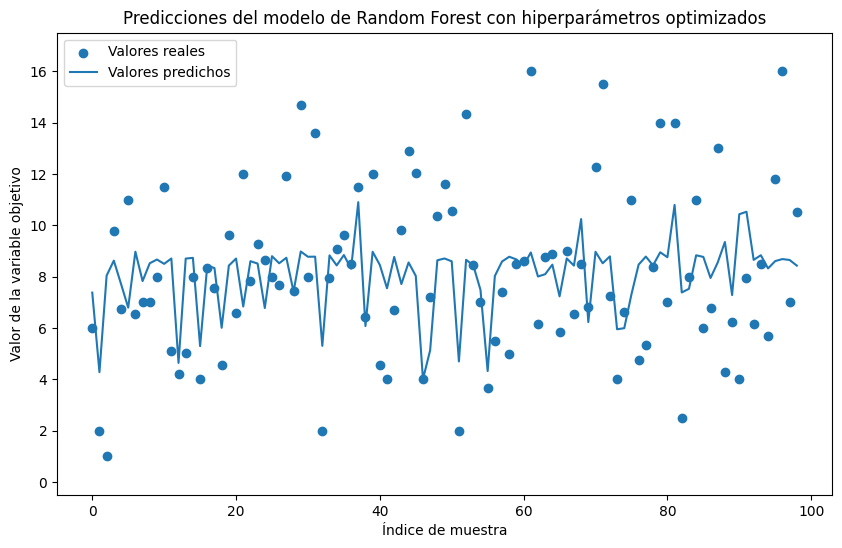

In [82]:
import matplotlib.pyplot as plt

# Hacer predicciones con el modelo optimizado
y_pred = Modelo6.predict(X_test)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Encontrar el rango de valores reales y predichos
y_min = min(min(y_test), min(y_pred))
y_max = max(max(y_test), max(y_pred))

# Trazar los valores reales vs. predichos
ax.scatter(range(len(y_test)), y_test, label='Valores reales')
ax.plot(range(len(y_test)), y_pred, label='Valores predichos')

# Ajustar los límites del eje y
ax.set_ylim(y_min - 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min))

# Agregar etiquetas y título
ax.set_xlabel('Índice de muestra')
ax.set_ylabel('Valor de la variable objetivo')
ax.set_title('Predicciones del modelo de Random Forest con hiperparámetros optimizados')
ax.legend()

# Mostrar la gráfica
plt.show()

In [118]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Definir el espacio de hiperparámetros a explorar para Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definir el espacio de hiperparámetros a explorar para Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Crear los modelos base
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros para Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_
print("Mejores hiperparámetros para Random Forest:", rf_best_params)

# Realizar la búsqueda de hiperparámetros para Gradient Boosting
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)
gb_best_params = gb_grid_search.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", gb_best_params)

# Entrenar los modelos base con los mejores hiperparámetros
rf_model = RandomForestRegressor(**rf_best_params, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(**gb_best_params, random_state=42)
gb_model.fit(X_train, y_train)

# Realizar predicciones con los modelos base
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Ensamble de modelos (promedio de predicciones)
ensemble_preds = (rf_preds + gb_preds) / 2

# Evaluar el ensamble de modelos
mse = mean_squared_error(y_test, ensemble_preds)
r2 = r2_score(y_test, ensemble_preds)
mae = mean_absolute_error(y_test, ensemble_preds)

print(f"Mean Squared Error (MSE) del ensamble: {mse:.3f}")
print(f"R-squared (R2) del ensamble: {r2:.3f}")
print(f"Mean Absolute Error (MAE) del ensamble: {mae:.3f}")

Mejores hiperparámetros para Random Forest: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error (MSE) del ensamble: 8.335
R-squared (R2) del ensamble: 0.221
Mean Absolute Error (MAE) del ensamble: 2.290


**Modelo de Regresión Lineal**

In [89]:
import pandas as pd


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred = modelo_lineal.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Coeficiente de determinación (R^2): {r2}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Coeficiente de determinación (R^2): 0.13588536061272738
Error cuadrático medio (MSE): 9.240463615811295
Error Absoluto Medio (MAE): 2.4077448776354022


**Modelo Lineal Generalizado**

In [114]:
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir el espacio de hiperparámetros a explorar
param_grid = {'power': [0, 1, 2, 3]}

# Crear el modelo de Tweedie Regressor
tweedie_model = TweedieRegressor(alpha=0.5, max_iter=1000)

# Realizar la búsqueda de hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(tweedie_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo final con los mejores hiperparámetros
final_model = TweedieRegressor(power=best_params['power'], alpha=0.5, max_iter=1000)
final_model.fit(X_train, y_train)

# Evaluar el modelo final en el conjunto de prueba
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R2): {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")

Mejores hiperparámetros: {'power': 1}
Mean Squared Error (MSE): 9.593
R-squared (R2): 0.103
Mean Absolute Error (MAE): 2.451


In [117]:
from sklearn.model_selection import cross_validate

# Definir las métricas a evaluar
scoring = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Realizar validación cruzada
scores = cross_validate(final_model, X_train, y_train, cv=5, scoring=scoring)

# Calcular las métricas
mse = -scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
mae = -scores['test_neg_mean_absolute_error'].mean()

# Imprimir las métricas
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")

Mean Squared Error (MSE): 8.558
Mean Absolute Error (MAE): 2.305


**Resultados**

Seguidamente se presenta una tabla de datos donde se registran las diferentes metricas de los modelos con el fin de elegir el mejor modelo para este proceso.



| Modelo         | MSE   | RMSE  | MAE   | MAE - Cros Validation | Algoritmo              | Mejores Hiperparámetros                            |
|----------------|-------|-------|-------|------------------------|------------------------|----------------------------------------------------|
| Modelo1        | 11.995| 3.463 | 2.578 | 2.2489                 | DecisionTreeRegressor  | Sin Hiperparámetros                                |
| Modelo2_svr    | 9.113 | 3.018 | 2.344 | 2.208                  | SVR                    | Sin Hiperparámetros                                |
| Modelo3_SVR    | 9.311 | 3.051 | 2.426 | 2.247                  | SVR                    | {'C': 1, 'epsilon': 1, 'kernel': 'linear'}         |
| Modelo5_RF     | 8.742 | 2.957 | 2.343 | 2.301                  | RandomForestRegressor  | Sin Hiperparámetros                                |
| **Modelo6**  | 8.398 | 2.898 | **2.256** | 2.205                  | RandomForestRegressor  | {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150} |
| **Modelo7**  | 9.240 | 3.039 | 2.407 |                   | Regresion Lineal  |  |
| **Modelo8**  | 8.558 | 2.925 | **2.451** | 2.305                  | MLG  | Mejores hiperparámetros: {'power': 1} |


**Conclusiones finales**

De acuerdo a estos resultados, se puede concluir:

1)El modelo de Random Forest con los hiperparámetros optimizados (Modelo 6) es el que tiene el mejor desempeño general, con los menores valores de MSE, RMSE, MAE y MAE de cross-validation, por lo tanto, se recomienda utilizar el modelo6(RandomForestRegressor con mejores hiperparámetros) para predecir los datos para mantenimiento correctivo.

2) La optimización de hiperparámetros mejoró el desempeño tanto para el modelo de SVR como para el de Random Forest.

3).El modelo de Random Forest supera al modelo de SVR, incluso con los hiperparámetros optimizados.


**Información Adicional para mejorar el Ajuste**

**Recomendaciones**

De acuerdo al uso de estos modelos para predecir tiempos de trabajo correctivo de manera semanal y analizando las métricas se dan algunas recomendaciones para mejorar significativamente las predicciones de tiempos.

•	Analizar nuevamente el dataset para agregar más variables que sean significativas y que permitan mejorar las predicciones.

•	Revisar si hay variables predictoras que puedan ser mejoradas o transformadas para reducir el error.

•	Probar con un mayor número de árboles y ajustar otros hiperparámetros, como la profundidad máxima y el número mínimo de muestras por nodo.

•	Explorar técnicas de ensamble, como el bagging o el boosting, para ver si se puede mejorar aún más el desempeño.

•	Validar exhaustivamente el modelo utilizando técnicas de validación cruzada para obtener una estimación más confiable del MAPE. (39.39%).

